In [1]:
import pickle
import numpy as np

def get_kl_data(final_path):
    with open(final_path, 'rb') as file:
        final_dict = pickle.load(file)
    return final_dict

In [2]:
#data_path = "/vol/aimspace/users/kaiserj/Individual_Privacy_Accounting/results_all_layers_vs_last_layer/full_vs_lastlayer_SmallCNN_all_three_500.pkl"
data_path = "/vol/aimspace/users/kaiserj/Individual_Privacy_Accounting/results_all_layers_vs_last_layer/full_vs_lastlayer_SmallCNN_all_three_500_convex.pkl"
data = get_kl_data(data_path)

kl_diag = data["kl"][0]
kl_ll = data["kl_ll"][0]
kl_proxy = data["kl_proxy"][0]


all_values = {
    "LSI diag" : kl_diag,
    "LSI Last-Layer" : kl_ll,
    "LSI Proxy": kl_proxy
}
print("")

<Figure size 640x480 with 0 Axes>

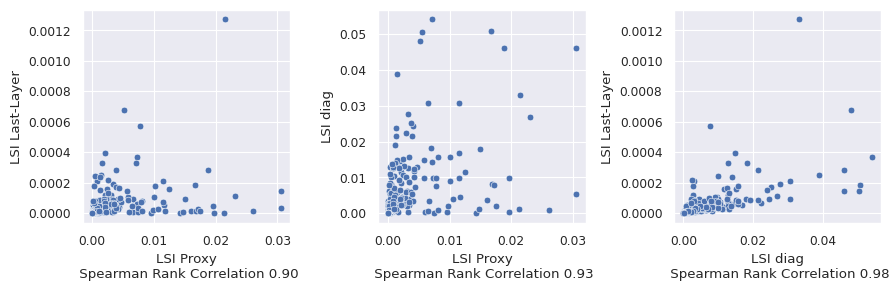

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import spearmanr

# Set Seaborn theme with paper context and font scale 2 (or 1.5)
sns.set_theme(context="paper", font_scale=2)

# Remove spines on every figure
sns.despine()

# Set colormap to "viridis" or another colorblind-friendly one
cmap = "viridis"

# Set minimum linewidth to 2
sns.set_context("paper", rc={"lines.linewidth": 2})

# Calculate the number of measures
measure_names = list(all_values.keys())
num_measures = len(measure_names)
# Create a figure for the subplots

comb = [[1,0],[1,2],[0,2]]  

fig, axes = plt.subplots(1, len(comb), figsize=(9, 3))


# Plot the point plots between each pair of measures
for k, (j, i) in enumerate(comb):
        ax = axes[k-1]
        sns.scatterplot(x=all_values[measure_names[i]], y=all_values[measure_names[j]], ax=ax)
        corr, _ = spearmanr(all_values[measure_names[i]], all_values[measure_names[j]])
        ax.set_xlabel(measure_names[i] + f"\n Spearman Rank Correlation {corr:.2f}")
        ax.set_ylabel(measure_names[j])
        ax.xaxis.get_offset_text().set_position((1.1, 0))  # Adjust the (x, y) position as needed


# Adjust layout
plt.tight_layout()


plt.show()